# Text classification using Naive Bayes Algorithm

### loading libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline

### fetching data

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### defining all the categories

In [3]:
categories = data.target_names

### Training the data on these categories

In [4]:
train = fetch_20newsgroups(subset='train',categories=categories)

### Testing the data on these categories

In [5]:
test = fetch_20newsgroups(subset='test',categories=categories)

In [6]:
train.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

 ### importing packages

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

### creating the model based on Multinomial Naive Bayes

In [8]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

### training the model with train data

In [9]:
model.fit(train.data, train.target)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### creating labels for the train data

In [11]:
labels = model.predict(test.data)

### evaluating model with confusion_matrix

Text(89.1331,0.5,'predicted label')

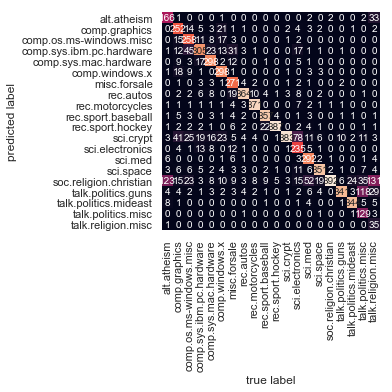

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test.target,labels)
sns.heatmap(conf_matrix.T,square=True,
            annot=True, fmt='d',cbar =False,
            xticklabels=train.target_names,yticklabels=train.target_names)

# plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

### Predicting the category of new data based on trained model

In [13]:
def predictCategory(text,train=train,model=model):
    pred = model.predict([text])
    return train.target_names[pred[0]]

### testing with some text to see how it performs

In [20]:
predictCategory('killigs on the streets')

'talk.politics.guns'